### Importing the Required Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

### Creating the model

In [8]:
# Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
# Pooling 
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))


# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))


# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))


# Passing it to a dense layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.2))

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_8 (Activation)    (None, 55, 55, 96)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
activation_9 (Activation)    (None, 23, 23, 256)       0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 23, 23, 256)      

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

### Generating extra images through Augmentation

In [10]:
train_augmentation=ImageDataGenerator(
rescale=1./255,
zoom_range=0.2,
shear_range=0.2,
horizontal_flip=True)

In [11]:
test_augmentation = ImageDataGenerator(rescale=1./255)

In [12]:
train_path='Dataset/Cat_Dog_Dataset/training_set'
valid_path='Dataset/Cat_Dog_Dataset/test_set'

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_augmentation.flow_from_directory('Dataset/Cat_Dog_Dataset/training_set',
                                                 target_size = (227, 227))

Found 8005 images belonging to 2 classes.


In [14]:
len(training_set)

251

In [15]:
test_set = test_augmentation.flow_from_directory('Dataset/Cat_Dog_Dataset/test_set', 
                                            target_size = (227, 227)) 

Found 2023 images belonging to 2 classes.


In [22]:
from keras.callbacks import ModelCheckpoint,CSVLogger

filepath = "saved_model/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1, save_best_only=True,mode='max')

log_csv = CSVLogger('my_logs.csv',separator=',', append=False)

callback_list =[checkpoint,log_csv]

### Fit the model

In [23]:
alexnet_model = model.fit_generator(training_set,epochs=30,validation_data=test_set, steps_per_epoch=len(training_set), validation_steps=len(test_set),callbacks=callback_list)

Epoch 1/30
251/251 [==============================] - 667s 3s/step - loss: 0.6188 - accuracy: 0.6658 - val_loss: 1.3399 - val_accuracy: 0.5002

Epoch 00001: val_accuracy improved from -inf to 0.50025, saving model to saved_model\weights-improvement-01-0.50.hdf5
Epoch 2/30
251/251 [==============================] - 608s 2s/step - loss: 0.5875 - accuracy: 0.7032 - val_loss: 0.6845 - val_accuracy: 0.5205

Epoch 00002: val_accuracy improved from 0.50025 to 0.52051, saving model to saved_model\weights-improvement-02-0.52.hdf5
Epoch 3/30
251/251 [==============================] - 599s 2s/step - loss: 0.5467 - accuracy: 0.7263 - val_loss: 0.7245 - val_accuracy: 0.6466

Epoch 00003: val_accuracy improved from 0.52051 to 0.64656, saving model to saved_model\weights-improvement-03-0.65.hdf5
Epoch 4/30
251/251 [==============================] - 594s 2s/step - loss: 0.5176 - accuracy: 0.7532 - val_loss: 2.1880 - val_accuracy: 0.4998

Epoch 00004: val_accuracy did not improve from 0.64656
Epoch 5/3

In [25]:
import matplotlib.pyplot as plt 

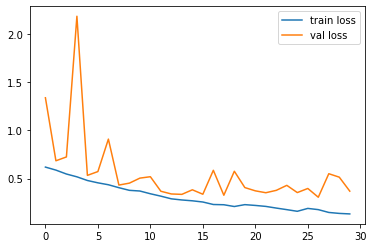

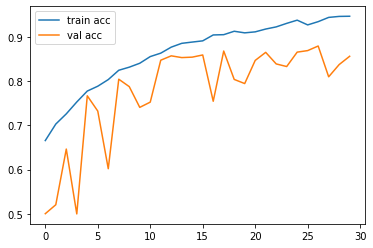

<Figure size 432x288 with 0 Axes>

In [46]:
# plot the loss 
plt.plot(alexnet_model.history['loss'], label='train loss') 
plt.plot(alexnet_model.history['val_loss'], label='val loss') 
plt.legend() 
plt.show() 
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(alexnet_model.history['accuracy'], label='train acc')
plt.plot(alexnet_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [10]:
m1 = model.load_weights('saved_model/weights-improvement-27-0.88.hdf5')

### Saving the model

In [11]:
model.save('Cat_Dog_Model_Alexnet.h5')

In [44]:
(eval_loss, eval_accuracy) = model.evaluate(test_set,verbose=1) 

64/64 [==============================] - 35s 541ms/step - loss: 0.3053 - accuracy: 0.8799


### Loading the model

In [3]:
model = tf.keras.models.load_model('Cat_Dog_Model_Alexnet.h5')

In [72]:
(eval_loss, eval_accuracy) = model.evaluate(training_set,verbose=1) 

251/251 [==============================] - 341s 1s/step - loss: 0.1419 - accuracy: 0.9464


In [71]:
(eval_loss, eval_accuracy) = model.evaluate(test_set,verbose=1) 

64/64 [==============================] - 35s 534ms/step - loss: 0.3053 - accuracy: 0.8799


In [4]:
from keras.preprocessing.image import img_to_array , load_img 

In [5]:
import numpy as np 

In [6]:
import time

[INFO] loading and preprocessing image…
Final Decision:
[[0.95066965 0.05120996]]
[0]
Cat


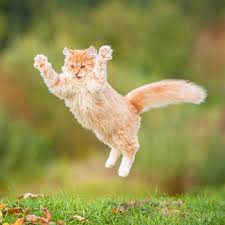

In [7]:
# predioct the images 
def read_image(file_path):
    print('[INFO] loading and preprocessing image…') 
    image = load_img(file_path, target_size=(227, 227)) 
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image /= 255. 
    return image

def test_single_image(path):
    images = read_image(path)
    time.sleep(.5)
    
    print('Final Decision:')
    time.sleep(.5)

    preds = model.predict(images)
    print(preds)
    preds=np.argmax(preds, axis=1)
    print(preds)
    if preds==0:
        preds="Cat"
    else:
        preds="Dog"
    print(preds)
    return load_img(path)


path = 'C:/Users/Swati Panchal/Downloads/cat4.jpg' 
test_single_image(path)  